# Deep-learning with Perceptron
--------

<b>A Perceptron is the basic unit of an artificial neuron.</b><br>
Once it is trained, it is capable of classifying data into two categories:
* Positive class: 1
* Negative class: -1
It is therefore capable of performing binary classification tasks like yes/no, true/false, a/b.<br>
The decision function for the Perceptron can be defined as a linear combination of certain input values and their corresponding weight values.

<br>

<b>The learning process of a Perceptron can be described as two steps</b>:
* Initializing the weights to 0 or small random numbers
* For each traning sample (or exercise):
  * Compute the output value
  * Adjust the weights 
  * Repeat the process until a proper coverage is obtained

<br>

<b>When using a Perceptron to predict the class of data, the following activation functions are relevant</b>:
* Step function:
  * If x < t: y = 0
  * If x >= t: y = 1
* Sign function:
  * If x < 0: y = -1
  * If x >= 0: y = 1
* Sigmoid function:
  * Non-linear function allowing y to be a number between 0 and 1
Our implementation will use the Sign function

## Perceptron implementation

Implements the Perceptron as a class with the following properties:
* Fields:
  * public int epochs
  * public float learning_rate
  * public float[] weights
  * public float[] training_error
* Methods:
  * --init--(self, no_of_inputs, epochs, learning_rate) - The constructor
  * predict(self, inputs) - The prediction algorithm
  * train(self, training_inputs, training_labels) - The training algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron(object):

    def __init__(self, no_of_inputs, epochs=100, learning_rate=0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        self.training_error = []
    
    def predict(self, inputs):
        net = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if net >= 0 else -1
    
    def train(self, training_inputs, training_labels):
        for _ in range(self.epochs):
            error = 0
            for inputs, label in zip(training_inputs, training_labels):
                prediction = self.predict(inputs) 
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0]  += self.learning_rate * (label - prediction)
                error += label - prediction
            self.training_error.append(error.mean())


## Testing ML-model with IRIS data

### Read dataset

Reading a dataset containing the petal length and sepal length of flowers and their corresponding label.<br>
The last rows of the dataset is printed to the console.

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


### Specify dimensions

<strong>X-axis</strong>:
* The values in the x-dimension is represented as a 2-dimensional matrix
* The format is as follows:
  * Rows: 100
  * Columns: 2
* The matrix is a cropped version of the original dataset containing all values for column 0 and 1

<strong>Y-axis</strong>:
* The values in the y-dimension are represented as a 1-dimensional column-vector
* It contains all labels for each row of the dataset, which is located at column 4
* The values in this column are either <i>Iris-setosa</i> or <i>Iris-virginica</i>
* The values contained in the y-axis are converted through the following transformation:
  * <i>Iris-setosa</i> &rarr; 1
  * <i>Iris-virginica</i> &rarr; -1
* The Y-axis represents the labels which are used for training the model

In [11]:
x = df.iloc[0:100, [0,2]].values
y = np.where(df.iloc[0:100, 4].values == 'Iris-setosa', 1, -1)
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


### Train model

An instance of the Percetron-class is created with the following properties:
* Number of inputs: 2 
  * X-axis representing the training data
  * Y-axis representing the training labels
* Number of epochs: 10
  * The training-algorithm will go through the input 10 times, adjusting its weights for each value
* Rate of learning: 0.1
  * Percentage of adjustment for each weight during a training epoch


The Perceptron is trained with the x-dimension and the y-dimension as parameters:
* For each epoch, the training-algorithm will:
  * Create a set of tuples where each tuple contains the training values and their corresponding label
  * Increase the starting weight with the product of the learning rate and the difference between the correct answer and the prediction
  * Increase the other weights with the product of the learning rate, the difference between the correct answer and the prediction, and the input values itself
  * Log the error rate which is calculated as the mean of all differences between correct answers and model predictions


The training error is plotted as a function of epochs:
* X-axis: Epochs 
* y-axis: Error rate
* The desired result is to observe that the error rate is closing in to zero


The resulting weights after training is printed out:
* The number of weights equals to the number of inputs for each "exercise" plus one
* Each weight represents the values which when multiplied with the input-matrix gave the most accurate results


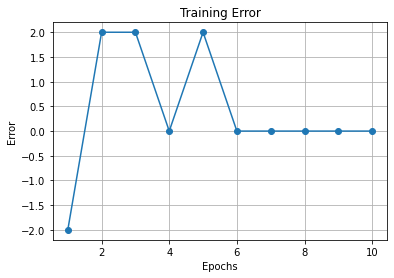

[ 0.4   0.7  -1.84]


In [4]:
p = Perceptron(no_of_inputs=2, epochs=10, learning_rate=0.1)
p.train(x, y)

plt.plot(range(1, len(p.training_error) + 1), p.training_error, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error')
plt.grid()
plt.show()

print(p.weights)

### Trained model prediction

The Perceptron predicts the label of each input in the x-axis:
* Each row in the input-matrix is predicted
* A separation-line is calculated using:
  * X: Linear graph starting at the minimum value of the input matrix to the maximum value with an increase rate of 0.1
  * Y: The difference between negative weight 1 divided by weight 2 multiplied with X, and weight 0 divided by weight 2


The result of the prediction is plotted as a scatter plot:
* The inputs with the setosa-label is plotted as red dots
* The inputs with the versicolor-label is plotted as blue crosses
* The separation line which is calculated through the result of the Perceptron's prediction is plotted as a line

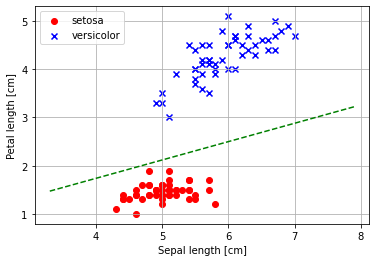

In [5]:
pred = []
for t in x:
    pred.append(p.predict(t))

x1_min = x[:, 0].min() - 1
x1_max = x[:, 0].max() + 1
xx1 = np.arange(x1_min, x1_max, 0.1)
xx2 = -1 * p.weights[1]/p.weights[2] * xx1 - p.weights[0]/p.weights[2]

plt.scatter(x[0:50,   0], x[0:50,   1], color='red',  marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='versicolor')
plt.plot(xx1, xx2, 'g--')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Error rate

Finally, one can determine the error-rate of the trained model by subtracting each predicted value from the actual value and divide it by the number of values (average calculation)

In [6]:
error = sum(y - pred)/len(y)
print(error)

0.0


## Saving and loading a model from file

### Saving a model

In [7]:
import h5py

h5f = h5py.File('perceptron_trained_model_16_02_22.h5', 'w')
h5f.create_dataset('dataset_1', data=p.weights)
h5f.close()

### Loading a model

In [9]:
h5f = h5py.File('perceptron_trained_model_16_02_22.h5', 'r')
dataset = h5f['dataset_1'][:]
for data in dataset:
    print(data)
h5f.close()

0.4
0.6999999999999997
-1.84


## Notes

<br><br>
<img src='Perceptron.jpg' alt='Perceptron' height=1000px>